# FoodHub Order Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import required libraries

In [1]:
# Installing the libraries with the specified version.
# !pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# Read the data
df = pd.read_csv("foodhub_order.csv")

In [6]:
# view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [7]:
# Shape of the dataset
df.shape

(1898, 9)

- Foodhub dataset contains 1898 rows and 9 columns. 

In [8]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


- The dataset contains 1,898 rows and 9 columns.
- The dataset contains three types of data.
  1. Integer for order ID, customer ID, food preparation time, and delivery time.
  2. Float for the cost of the order
  3. Object for restaurant name, cuisine type, day of the week, and rating.
- No missing values are present in any column, as all columns have 1,898 non-null values.
- The rating column is stored as an object (string) instead of a numerical type, which may require conversion for numerical analysis.
- The dataset occupies approximately 133.6 KB of memory.

In [9]:
# find missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

- There are no missing values in the dataset since all columns have 0 missing entries. This means we don’t need to perform any missing value treatment. 

In [10]:
# statistical summay of the data
df.describe()

## To inlcude categorical data also, we can use inlcude = 'all' parameter
# df.describe(include = 'all')

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


- order_id and customer_id are unique for each order and customer, so their statistical metrics (like mean, min, and max) are not meaningful for analysis.
- df.describe().drop(columns=['order_id', 'customer_id']) will exclude order_id and customer_id from statistical summary.
- The food preparation time ranges from a minimum of 20 minutes to a maximum of 35 minutes, with an average time of 27.37 minutes.

### Exploratory Data Analysis (EDA)

In [77]:
# funtion for countplot
def countplotfunc(data, column, order=None):
    sns.countplot(data=data, x=column, order=order)
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [78]:
# function for histplot
def histplotfunc(data, column):
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.show()

In [79]:
# funtion for boxplot
def boxplotfunc(data, column):
    sns.boxplot(data=data, x=column)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [80]:
# value_counts summary 
def value_counts_summary(data, column):
    vc = data[column].value_counts(dropna=False)
    pct = data[column].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'Count': vc, 'Percent': pct.round(2)})
    return summary

### Univariate Analysis

- order id and customer id are an unique identifier for each order.
- Using order_id feature, we can understand how many orders placed so far through the online portal. This helps to understand overall activity and business volume.

In [20]:
# order_id variable
orders_count = df['order_id'].count()
orders_count

np.int64(1898)

In [21]:
# customer_id varibale
customer_order_count = df['customer_id'].value_counts()
customer_order_count 

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

In [22]:
one_time_customers_count = (customer_order_count == 1).sum()
one_time_customers_count

np.int64(784)

- Only a small portion of customer are placing orders frequently. We can observe that many customer have placed orders only once.

In [23]:
# Restaurant name variable
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

- The dataset contains 178 unique restaurant names. The most common restaurant is Shake Shack, with 219 orders, followed by The Meatball Shop (132 orders), Blue Ribbon Sushi (119 orders) ans so on.

In [24]:
# restaurants that have less frequent orders. 
(df.groupby('restaurant_name')['restaurant_name'].transform('count') == 1).sum()

np.int64(50)

- There are 50 unique restaurants in the dataset that have only 1 order. This indicates that there are many restaurants have less frequent orders placed through online portal. 

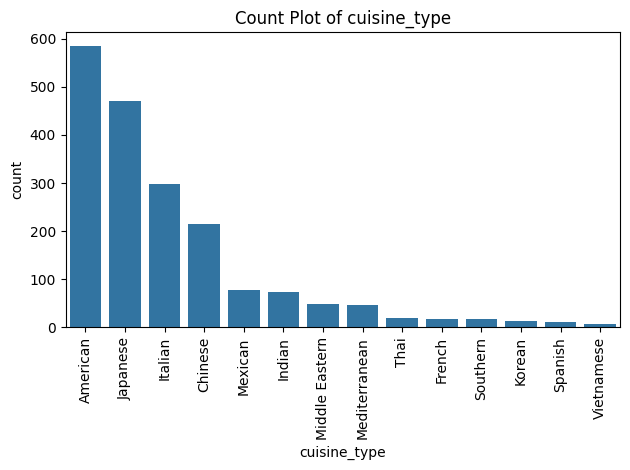

Total cuisne types :  14


In [38]:
# cuisine_type
countplotfunc(df, 'cuisine_type', order = df['cuisine_type'].value_counts().index)


#unique cuisine list
print("Total cuisne types : ", df['cuisine_type'].nunique())

- The American cuisine in the plot indicating it is the most popular cuisine in the dataset with the highest number of orders followed by Japanese, Italian, and Chinese cuisines. This says that these cuisines have more frequent orders through the portal.

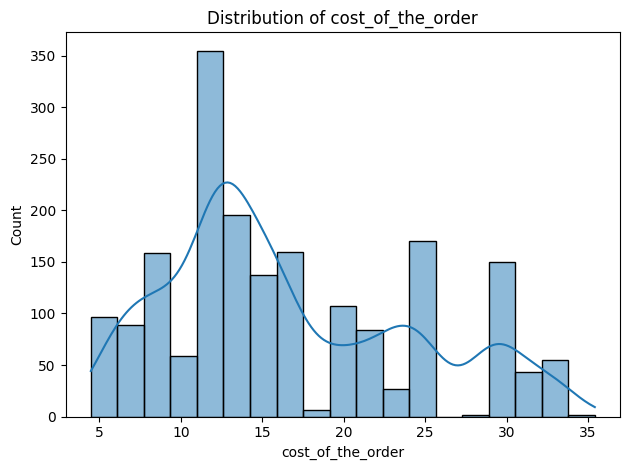

In [40]:
# cost_of_the_order
histplotfunc(df, 'cost_of_the_order')

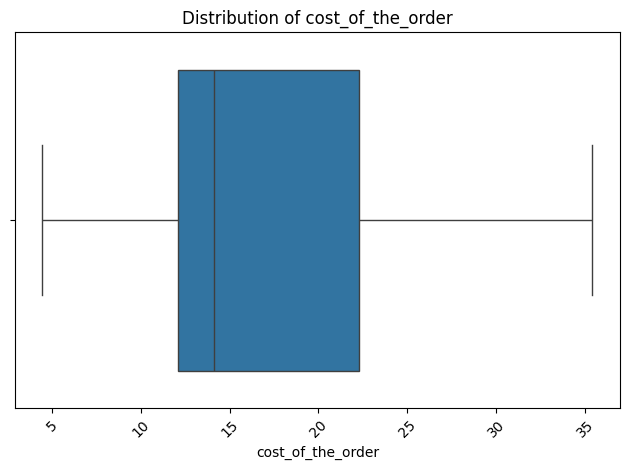

In [41]:
boxplotfunc(df, 'cost_of_the_order')

- cost_of_the_order is continuos varaible. histogram will be appropraite to understand order cost distribution.
- Cost of the orders ranges from 5 dollars to 35 dollars.
- From the histogram we can say that the distribution is multimodal (multiple peaks)
- Most frequent orders are around $12-15 price.

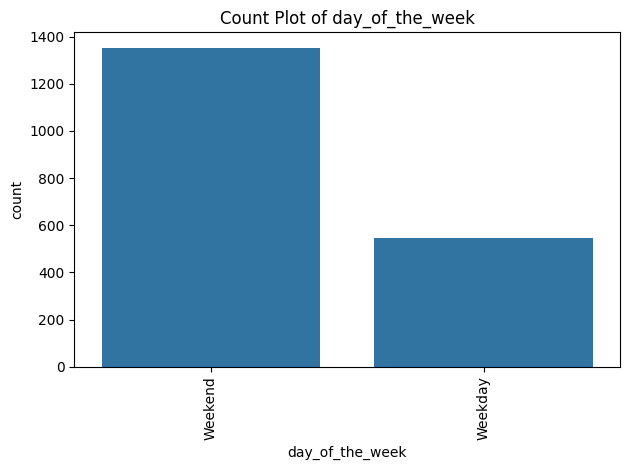

In [42]:
# day_of_the_week 
countplotfunc(df, 'day_of_the_week')

In [45]:
value_counts_summary(df, 'day_of_the_week')

,Count,Percent
day_of_the_week,,
Weekend,1351,71.18
Weekday,547,28.82


- The orders placed on the Weekends(Saturday and Sunday) are significantly higher than the orders placed on the Weekdays(Monday to Friday). This shows that people tend to order more food online during the weekend.

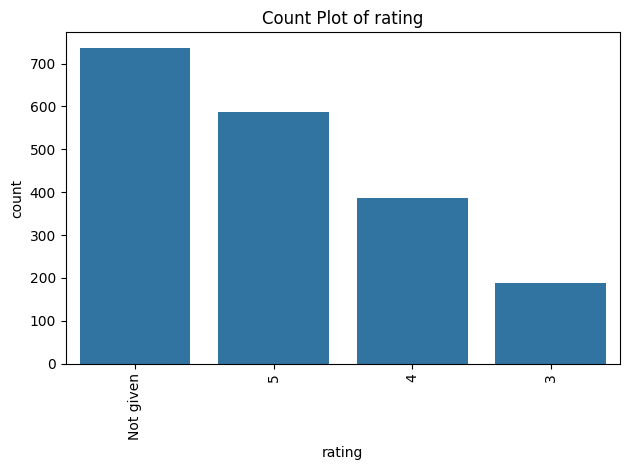

In [44]:
# rating
countplotfunc(df, 'rating', order=['Not given', '5', '4', '3'])

In [46]:
value_counts_summary(df, 'rating')

,Count,Percent
rating,,
Not given,736,38.78
5,588,30.98
4,386,20.34
3,188,9.91


- A significant portion (38.78%) of users did not provide a rating. This missing customer rating might impact customer satisfaction analysis.
- Among those who rated, the majority gave high marks: 5 stars (30.98%) and 4 stars (20.34%).
- Lower ratings (3 stars) account for less than 10% of all responses.
- No ratings below 3 stars are present 

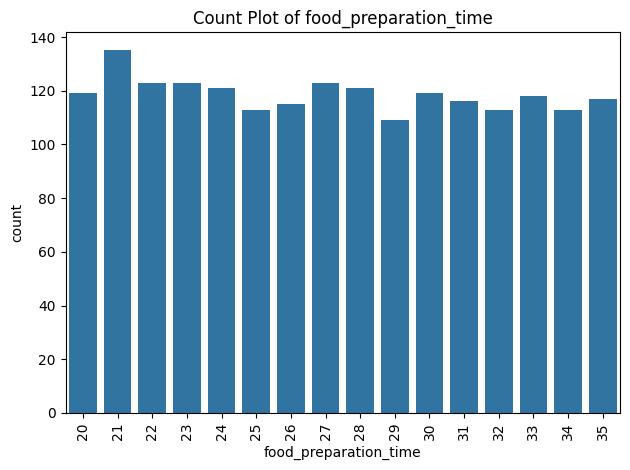

In [52]:
# food_preparation_time
countplotfunc(df, 'food_preparation_time')

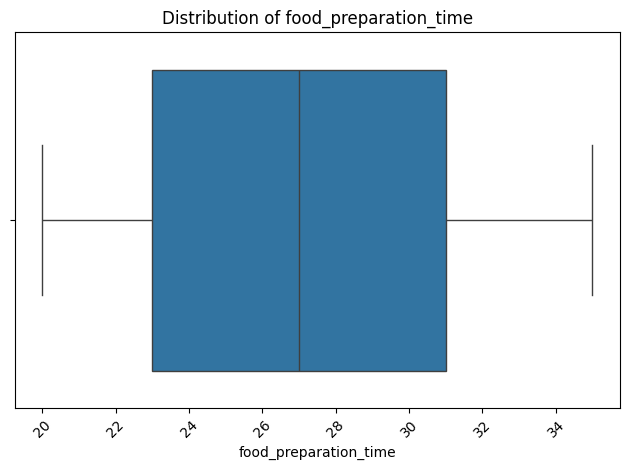

In [53]:
boxplotfunc(df, 'food_preparation_time')

In [54]:
value_counts_summary(df,'food_preparation_time')

,Count,Percent
food_preparation_time,,
21,135,7.11
23,123,6.48
27,123,6.48
22,123,6.48
28,121,6.38
24,121,6.38
20,119,6.27
30,119,6.27
33,118,6.22


- Food preparation time ranges from 20 to 35 minutes
- The highest frequency of preparation time is at 21 minutes (approximately 135 orders)
- The lowest frequency is at 29 minutes (approximately 110 orders)
- The median preparation time is around 27 minutes (from box plot)
- The distribution is relatively uniform
- There are no outliers
- The variation in preparation times is small, suggesting standardized cooking processes

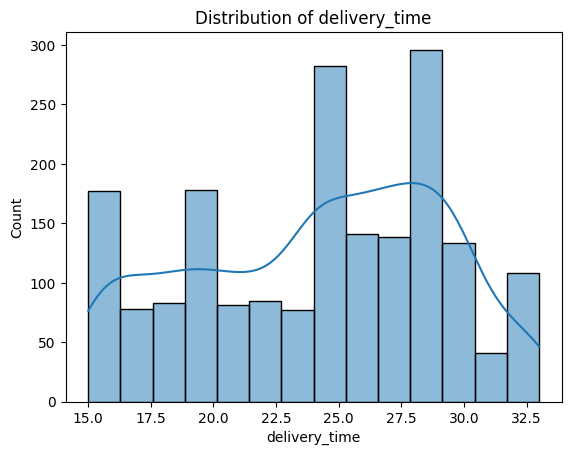

In [57]:
# delivery_time
histplotfunc(df, 'delivery_time')

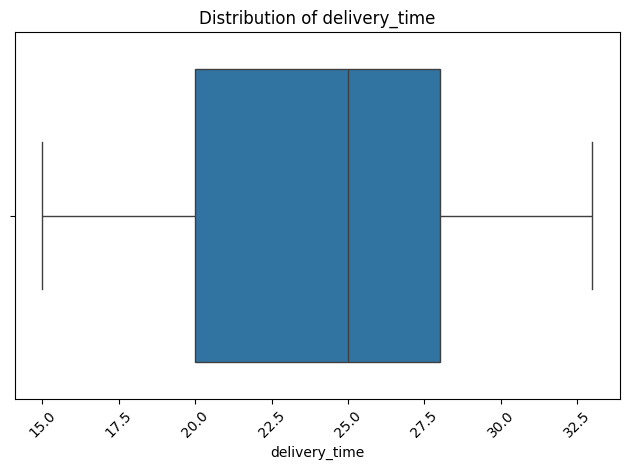

In [58]:
boxplotfunc(df, 'delivery_time')

- Delivery times range from 15 to 32.5 minutes
- Lowest delivery frequency is around 31 minutes
- There is a sharp decline in delivery frequencies after 28 minutes
- The median delivery time is around 25 minutes

### Multivariate analysis:

#### Which are the top 5 restaurants in terms of the number of orders received? 

In [60]:
# To get top 5 restaurants and no of orders received
top_5_restaurants = df['restaurant_name'].value_counts().head(5).reset_index()

top_5_restaurants.columns = ["Restaurant Name", "Total Orders"]

top_5_restaurants

,Restaurant Name,Total Orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


- The output shows top 5 restaurants and number of orders received. Shake Shack stands on top with 219 total orders placed through the online portal. 

#### Which is the most popular cuisine on weekends? 

In [61]:
popular_cuisines = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(5).reset_index()

popular_cuisines.columns = ["Cuisine Type", "Total Orders"]
popular_cuisines

,Cuisine Type,Total Orders
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53


- American cuisine is the most popular cuisine on weekends with total 415 orders. 

#### What percentage of the orders cost more than 20 dollars? 

In [62]:
orders_more_than_20dollars = df[df['cost_of_the_order'] > 20] 

percentage = (len(orders_more_than_20dollars) / df.shape[0])  * 100

print("Percentage of orders with cost greater than 20 dollars: ", round(percentage, 2) ,"%")


Percentage of orders with cost greater than 20 dollars:  29.24 %


- 29.24% of the orders cost more than 20 dollars. The remaining 70% of orders are below or equal to 20 dollars, which might represent more budget-friendly options or smaller orders.


#### What is the mean order delivery time?

In [63]:
mean_order_delivery_time = df['delivery_time'].mean()

print("Mean order delivery time is ",round(mean_order_delivery_time,2),"minutes")

Mean order delivery time is  24.16 minutes


- The mean order delivery time is 24.16 minutes. This means, on average, it takes 24.16 minutes for an order to be delivered once the order is picked up by the delivery person. 

#### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [64]:
# to find top3 customers and number of orders they placed

top_3_customers = df['customer_id'].value_counts(ascending=False).head(3).reset_index()
top_3_customers.columns = ["Customer ID", "Total Orders"]

top_3_customers

,Customer ID,Total Orders
0,52832,13
1,47440,10
2,83287,9


- Customer IDs 52832, 47440, 83287 are top3 most frequent customers ordering through the portal. Giving them discounts can help retain them and encourage even more orders.

#### Most Expensive Cuisine Type

In [65]:
expensive_cuisines = df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)
top_5_expensive_cuisines = list(expensive_cuisines.head(5).index)

print("Top 5 expensive cuisine types are :", top_5_expensive_cuisines)

Top 5 expensive cuisine types are : ['French', 'Southern', 'Thai', 'Spanish', 'Middle Eastern']


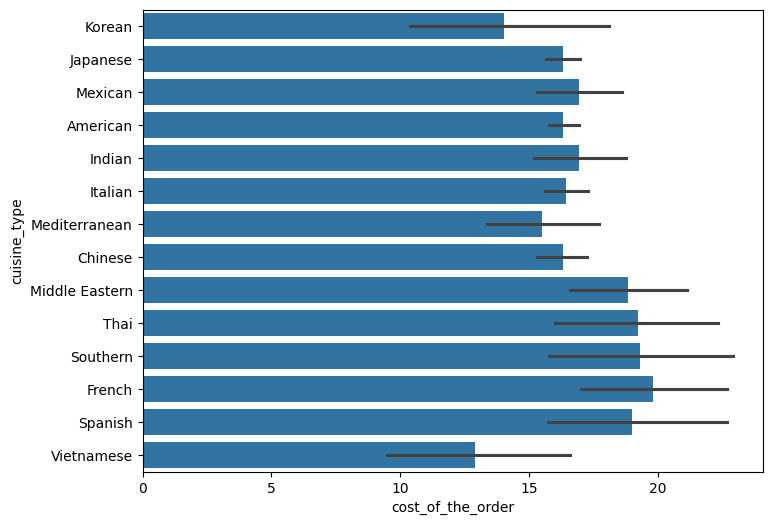

In [66]:
plt.figure(figsize =(8,6))
sns.barplot(data = df, x = 'cost_of_the_order',  y = 'cuisine_type' )
plt.show()

- The top 5 most expensive cuisine types are French, Southern, Thai, Spanish, and Middle Eastern. This shows that these cuisines generally have higher-priced dishes compared to others.

#### Do restaurants with higher average order costs tend to have higher ratings?

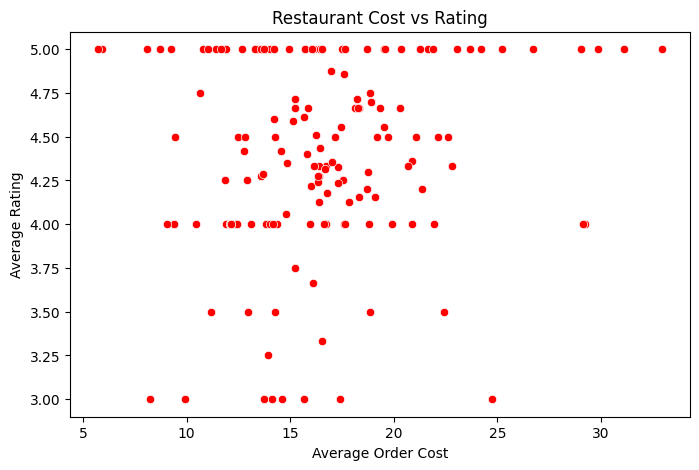

In [67]:
# Converting rating column to numeric ('Not given' as NaN)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Groupby restaurant and calculate average order cost & rating
restaurant_analysis = df.groupby('restaurant_name').agg(avg_cost=('cost_of_the_order', 'mean'), avg_rating=('rating', 'mean'))

plt.figure(figsize=(8, 5))
sns.scatterplot(data=restaurant_analysis, x='avg_cost', y='avg_rating', color='red')
plt.xlabel('Average Order Cost')
plt.ylabel('Average Rating')
plt.title('Restaurant Cost vs Rating')
plt.show()

- There's no strong linear relationship between average order cost and restaurant ratings
- Ratings range from 3.0 to 5.0, with most restaurants clustering between 4.0 and 5.0 stars
- High-rated restaurants (5.0) exist across all price points, from budget to expensive. Similarly, lower-rated restaurants are found across various price ranges
- The scatter pattern suggests that price doesn't necessarily guarantee better ratings
- Very expensive restaurants (>$25) maintain mostly high ratings (4.0-5.0)

#### Which cuisine types are profitable in the portal.

In [68]:
profitable_cuisines = df.groupby('cuisine_type')['cost_of_the_order'].sum().sort_values(ascending=False)
profitable_cuisines

cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Southern           328.11
Spanish            227.93
Korean             182.02
Vietnamese          90.18
Name: cost_of_the_order, dtype: float64

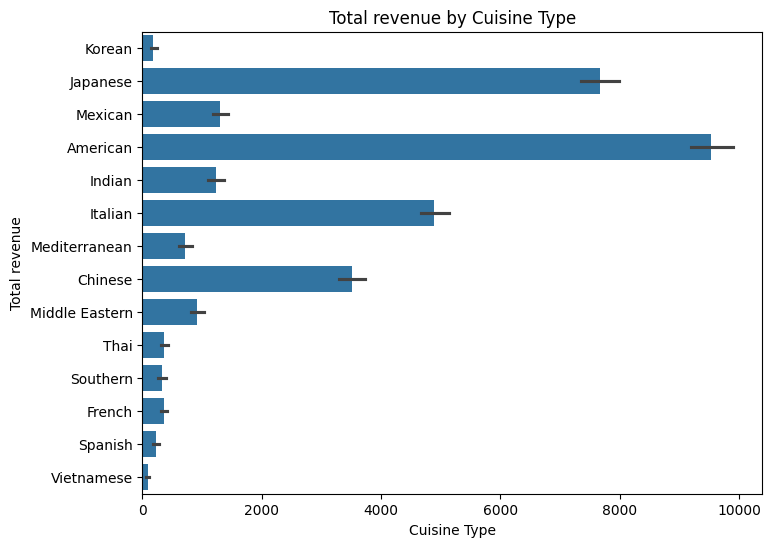

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='cost_of_the_order', y='cuisine_type', estimator='sum')
plt.ylabel("Total revenue")
plt.xlabel("Cuisine Type")
plt.title('Total revenue by Cuisine Type')
plt.show()

- American cuisine is the most profitable with total revenue of $9,530, significantly higher than other cuisines
- There's a large gap between the top 3 cuisines and the rest

#### Correlation between numerical features

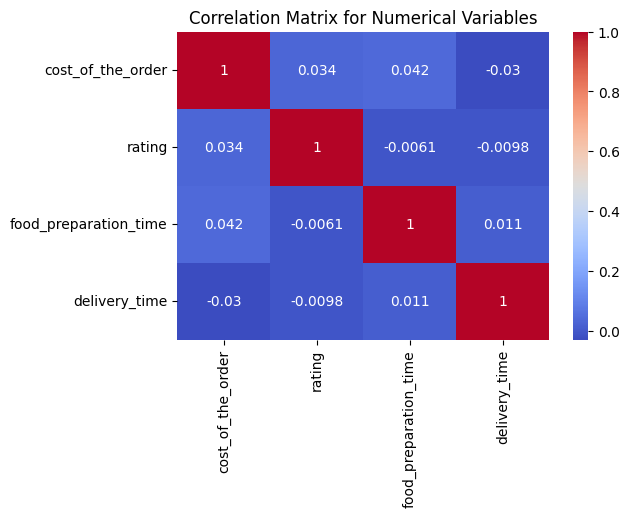

In [70]:
# Correlation for Numerical Variables
numerical_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

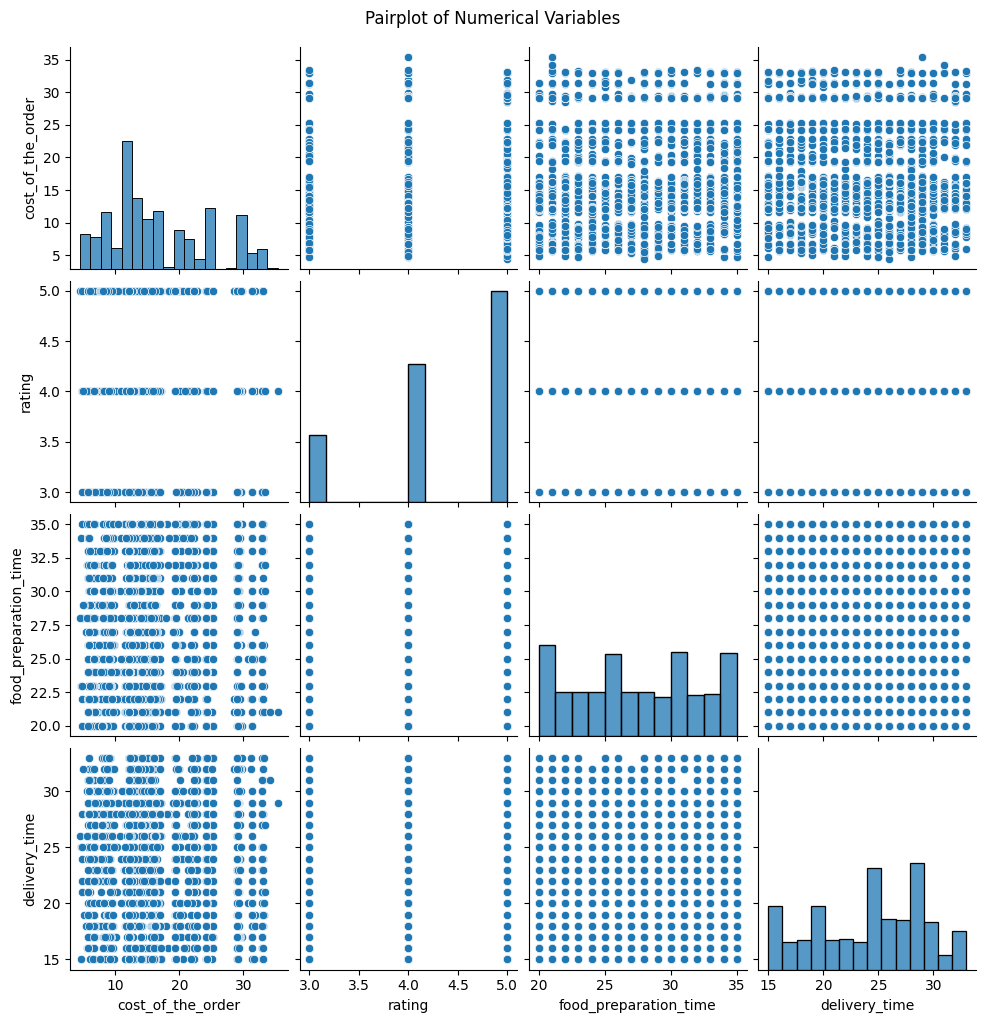

In [71]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

- All correlations are extremely weak, indicating that these variables are essentially independent of each other. None of the relationships show meaningful correlations that would be significant for business decision-making.

#### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [72]:
# converting rating column to numeric. 
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant and calculating count, mean of Rating
restaurants_filter = df.groupby('restaurant_name')['rating'].agg(['count','mean'])

# Applying offer condition
offer_condition = restaurants_filter[(restaurants_filter['count'] >50) & (restaurants_filter['mean'] >4)]

offer_condition.reset_index()


,restaurant_name,count,mean
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


- The restaurants that qualify for the promotional offer based on the given conditions are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop. These restaurants have received more than 50 ratings, and their average rating is above 4. These restaurants can be featured in the advertisement as they have a good number of customer reviews and high ratings.


#### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [73]:
revenue_generated = 0

for i in df['cost_of_the_order']:
    if i >20:
        revenue_generated += (i - (i * 0.75)) 
    elif i >5:
        revenue_generated += (i - (i * 0.85))
    else:
        continue

print("Total reveneue generated by the company is", round(revenue_generated,3))

Total reveneue generated by the company is 6166.303


- The company made 6166.30 dollars from charging a commission on orders. Orders costing more than 20 dollars were charged 25%, and orders above 5 dollars were charged 15%. This means higher-priced orders helped the company earn more revenue.

#### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [74]:
#  Calculate total time
df['total_order_time'] = df['food_preparation_time'] + df ['delivery_time']

# Percentage of orders that take more than 60 minutes
more_than_60_mins = (len(df[df['total_order_time'] > 60]) / df.shape[0] ) * 100 

print(round(more_than_60_mins,2), "% of orders take more than 60 minutes to get delivered from the time of order is placed.")

10.54 % of orders take more than 60 minutes to get delivered from the time of order is placed.


- 10.54% of the total orders take more than 60 minutes from order placement to delivery. This means that a certain portion of customers experience a longer wait time, which could impact customer satisfaction.

#### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [75]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [76]:
# Calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# mean delivery time for weekends
mean_delivery_time_weekend = mean_delivery_time['Weekend']

# mean delivery time for weekdays
mean_delivery_time_weekday = mean_delivery_time['Weekday']

# difference in mean delivery time
diff = round(mean_delivery_time_weekday - mean_delivery_time_weekend , 2)

print("Mean delivery time for weekends :", round(mean_delivery_time_weekend, 2))
print("Mean delivery time for weekdays :", round(mean_delivery_time_weekday, 2))
print("The mean delivery time vary by",diff,"mins during weekdays and weekends")


Mean delivery time for weekends : 22.47
Mean delivery time for weekdays : 28.34
The mean delivery time vary by 5.87 mins during weekdays and weekends


- The mean delivery time for weekdays is 28.34 minutes, while the mean delivery time for weekends is 22.47 minutes. This shows that, on average, orders take 5.87 minutes longer to deliver on weekdays compared to weekends.

### Conclusion and Recommendations

### Conclusions:
- A majority of orders (70%) are priced at or below \$20, suggesting most customers prefer budget-friendly options.
- Only a small portion of customers order frequently, indicating that a large number of users may be one-time buyers.
-  Many restaurants (50) have only received one order, suggesting that customer preferences are concentrated on a few popular restaurants.
- American cuisine is the most popular and also the most profitable, generating the highest revenue.
- Most orders are placed on weekends, suggesting peak usage aligns with customer free time.
- Average food preparation time is around 27 minutes, and delivery time is around 24 minutes, indicating relatively efficient service.
- A notable portion of ratings are marked as “Not given,” which may limit insights into customer satisfaction. Filling these gaps or encouraging more ratings could enhance future analysis.
- There is no strong correlation between order cost and restaurant ratings. High-rated restaurants exist across all price ranges, indicating that cost alone doesn’t guarantee a better rating.
- The company generated $6,166.30 in revenue from commission charges, with higher-priced orders contributing more.

### Recommendations:
- Target one time customers with personalized promotions to convert them into repeat buyers.
- Provide special visibility to underperforming restaurants like those with only one order to boost their engagement.
- Encourage customers to leave ratings, as 38.7% of orders have missing ratings, which could be valuable for analysis and also address reasons for low ratings (<3) by gathering feedback from customers.